# matlab 图像处理

## 1. 图像基本操作

In [1]:
%% 读入图片
img = imread('d.jpg');

%% RGB图转换成灰度图
img_gray = rgb2gray(img);

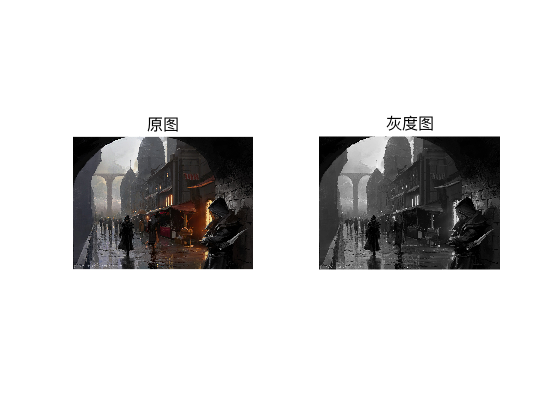

In [2]:
%% 显示原图和灰度图
figure(1)
subplot(121)
imshow(img), title('原图');
subplot(122);
imshow(img_gray), title('灰度图')

## 2. 图像几何变换

### 缩放

In [3]:
%% 缩放
img_bigger_nearest  = imresize(img, 1.3, 'nearest' );
img_bigger_bilinear = imresize(img, 1.3, 'bilinear');
img_bigger_bicubic  = imresize(img, 1.3, 'bicubic' ); % default
img_bigger_bicubic_without_antialiasing    = imresize(img, 1.3, 'bicubic', 'Antialiasing', false);
img_bigger_bicubic_without_color_dithering = imresize(img, 1.3, 'bicubic', 'Dither', false);
img_smaller = imresize(img, 0.5);

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


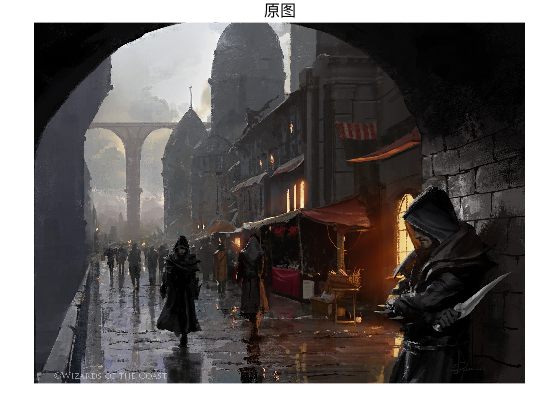

In [4]:
figure, imshow(img),         title('原图');

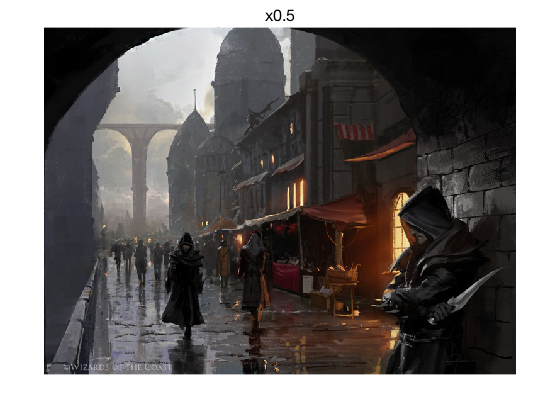

In [5]:
figure, imshow(img_smaller), title('x0.5')

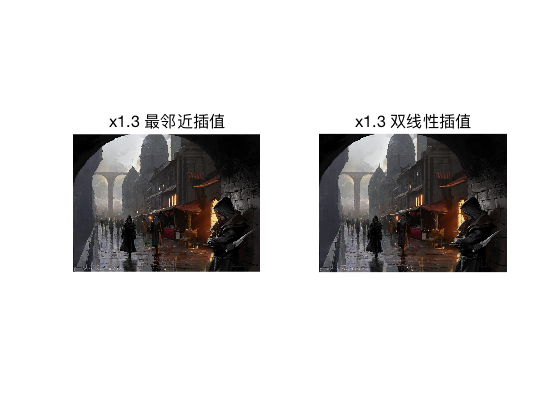

In [6]:
subplot(121)
imshow(img_bigger_nearest) , title('x1.3 最邻近插值');
subplot(122)
imshow(img_bigger_bilinear), title('x1.3 双线性插值');

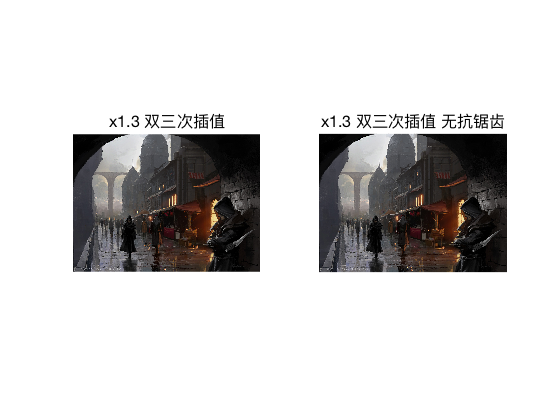

In [7]:
subplot(121)
imshow(img_bigger_bicubic) , title('x1.3 双三次插值');
subplot(122)
imshow(img_bigger_bicubic_without_antialiasing), title('x1.3 双三次插值 无抗锯齿');

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


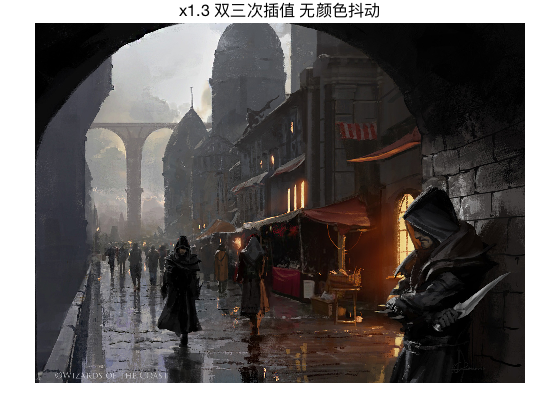

In [8]:
figure, imshow(img_bigger_bicubic_without_color_dithering), title('x1.3 双三次插值 无颜色抖动');

### 旋转

In [9]:
%% 旋转
img_rotate_c90_nearest = imrotate(img, -90, 'nearest'); % default
img_rotate_cc90_nearest = imrotate(img, 90, 'nearest');

img_rotate_cc90_bilinear = imrotate(img, 90, 'bilinear');
img_rotate_cc90_bicubic  = imrotate(img, 90, 'bicubic' );

img_rotate_cc90_nearest_crop = imrotate(img, 90, 'nearest', 'crop');
img_rotate_cc90_nearest_loose = imrotate(img, 90, 'nearest', 'loose'); % default

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


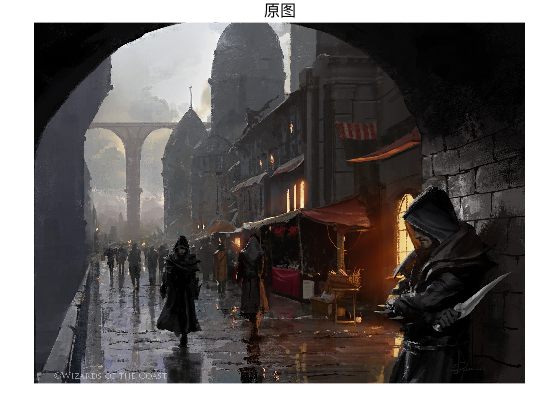

In [10]:
figure, imshow(img), title('原图')

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)
警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


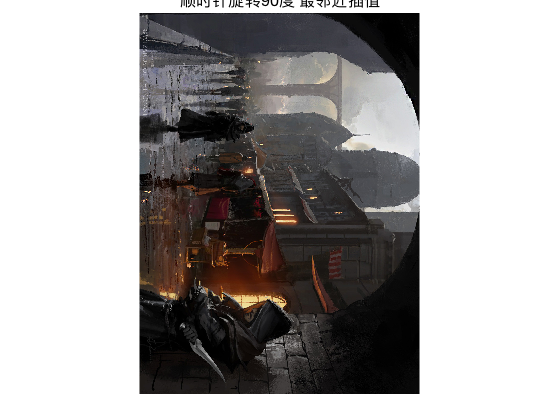

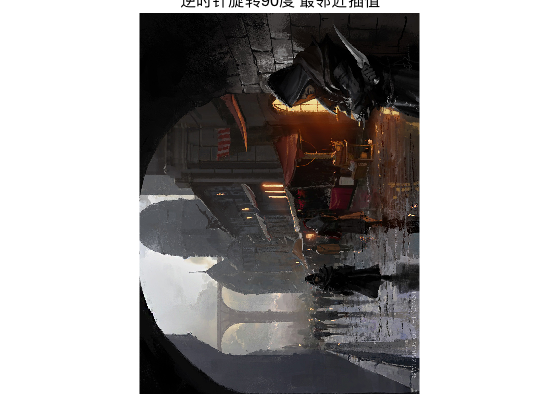

In [11]:
figure, imshow(img_rotate_cc90_nearest), title('逆时针旋转90度 最邻近插值')
figure, imshow(img_rotate_c90_nearest) , title('顺时针旋转90度 最邻近插值')

警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)
警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


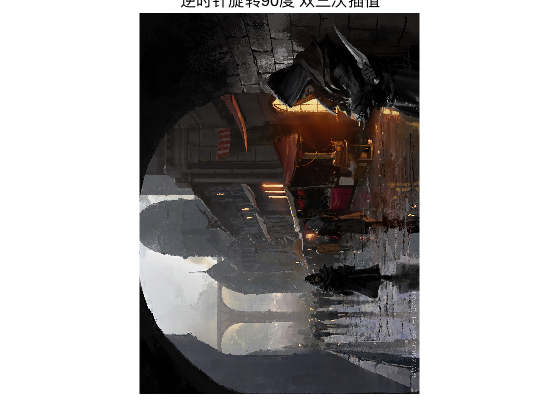

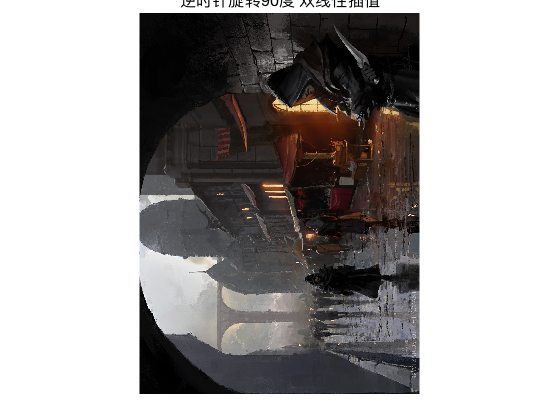

In [12]:
figure, imshow(img_rotate_cc90_bilinear), title('逆时针旋转90度 双线性插值')
figure, imshow(img_rotate_cc90_bicubic), title('逆时针旋转90度 双三次插值')

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)
警告: 图像太大，无法在屏幕上显示；将以 50% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


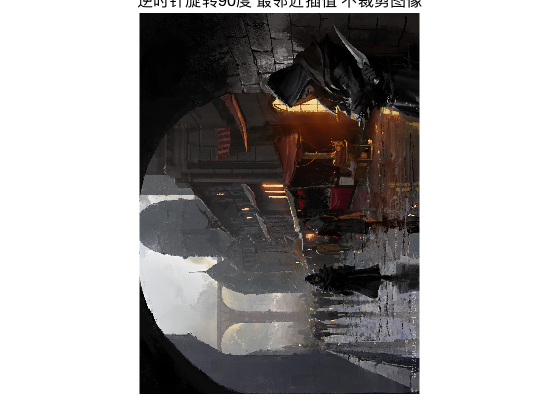

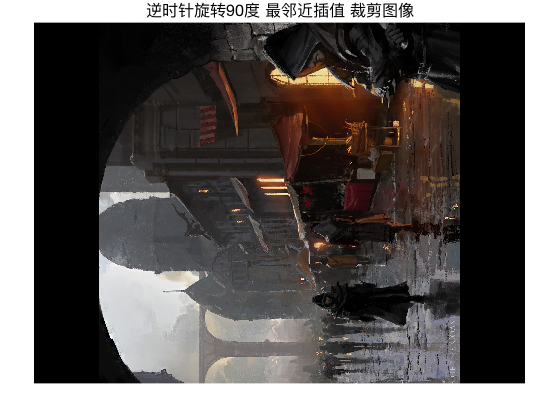

In [13]:
figure, imshow(img_rotate_cc90_nearest_crop), title('逆时针旋转90度 最邻近插值 裁剪图像')
figure, imshow(img_rotate_cc90_nearest_loose), title('逆时针旋转90度 最邻近插值 不裁剪图像')

### 翻转

In [14]:
%% 翻转
img_flip_LR = flip(img,2);
img_flip_UD = flip(img,1);
img_flip_LR_UD = flip(img_flip_LR, 1);

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)
警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


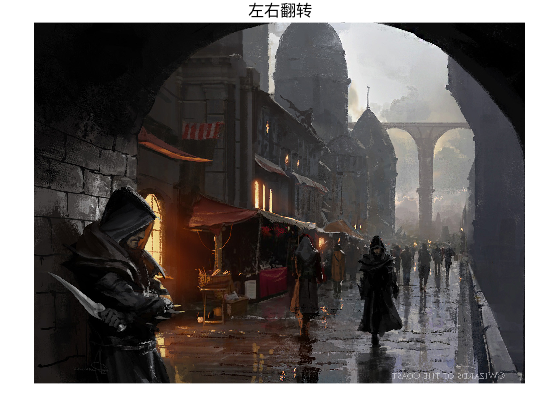

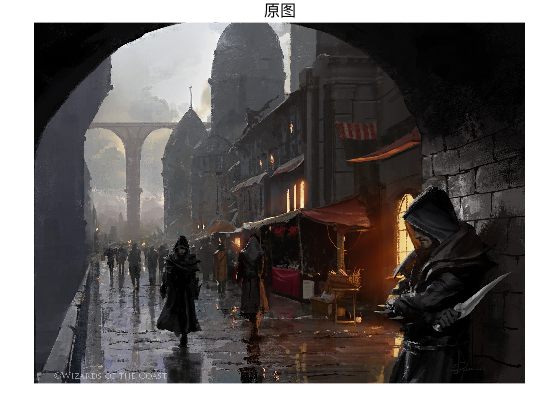

In [15]:
figure, imshow(img), title('原图')
figure, imshow(img_flip_LR), title('左右翻转')

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)
警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 332)


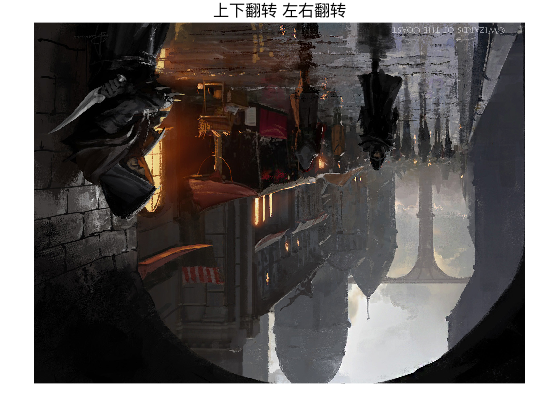

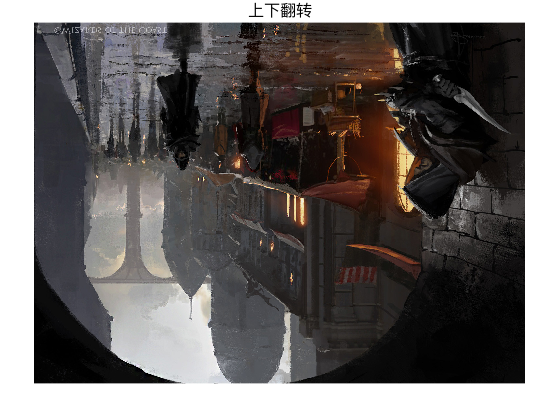

In [16]:
figure, imshow(img_flip_UD), title('上下翻转')
figure, imshow(img_flip_LR_UD), title('上下翻转 左右翻转')

## 3. 直方图均衡化

In [17]:
%% 直方图均衡化
[m,n] = size(img_gray);

### 调用Matlab自带直方图均衡化

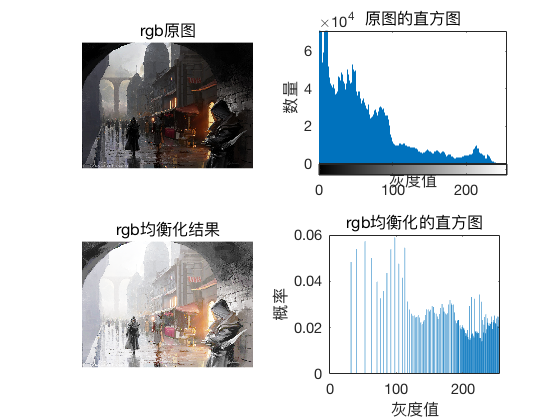

In [18]:
figure(1)
subplot(221),imshow(img), title('rgb原图')
subplot(222),imhist(img),title('原图的直方图'), xlabel('灰度值'), ylabel('数量')
[cnt, xc] = imhist(img);
img_eq = histeq(img, xc);
subplot(223),imshow(img_eq), title('rgb均衡化结果')
[cnt_eq, xc_eq] = imhist(img_eq);
subplot(224),bar(xc_eq,cnt_eq/m/n), title('rgb均衡化的直方图'), xlabel('灰度值'), ylabel('概率')
imwrite(img_eq, 'matlab均衡化.jpg')

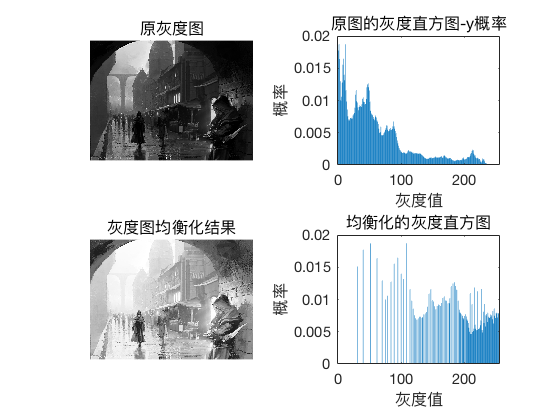

In [19]:
figure(2)
subplot(221),imshow(img_gray), title('原灰度图')
[gray_cnt, gray_xc] = imhist(img_gray);
subplot(222),bar(gray_xc, gray_cnt/m/n), title('原图的灰度直方图-y概率'), xlabel('灰度值'), ylabel('概率')

img_gray_eq = histeq(img_gray,gray_xc);
[gray_cnt_eq, gray_xc_eq] = imhist(img_gray_eq);
subplot(223),imshow(img_gray_eq), title('灰度图均衡化结果')
subplot(224),bar(gray_xc_eq,gray_cnt_eq/m/n), title('均衡化的灰度直方图'), xlabel('灰度值'), ylabel('概率')

### 基于直方图均衡化原理

In [20]:
%% 手工实现均衡化与自带函数对比
PDF = gray_cnt/m/n;
CDF = cumsum(PDF);
img_gray_eq_me = img_gray;
for i=1:256
   idx = find(img_gray==i);
   for j=1:length(idx)
       img_gray_eq_me(idx(j))=round(CDF(i)*(256-1));
   end
end
[cnteq_me, xceq_me] = imhist(img_gray_eq_me);

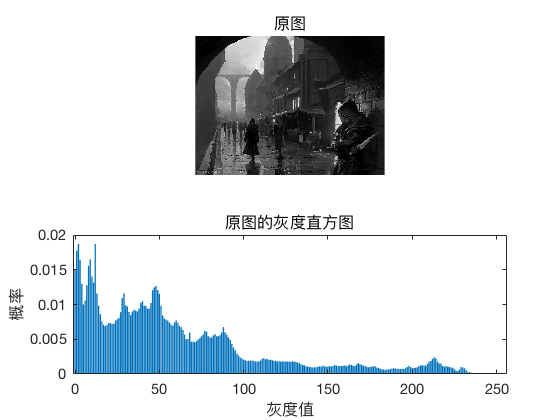

In [21]:
figure(1)
subplot(211)
figure(1), imshow(img_gray), title('原图')
subplot(212)
figure(1), bar(gray_xc, gray_cnt/m/n), title('原图的灰度直方图'), xlabel('灰度值'), ylabel('概率')

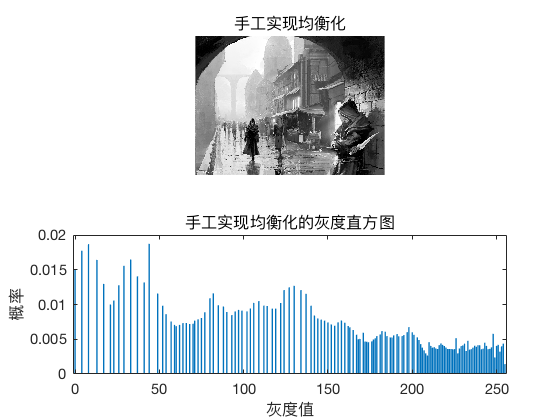

In [22]:
figure(2)
subplot(211)
imshow(img_gray_eq_me), title('手工实现均衡化');
subplot(212)
bar(xceq_me, cnteq_me/m/n), title('手工实现均衡化的灰度直方图'), xlabel('灰度值'), ylabel('概率') 

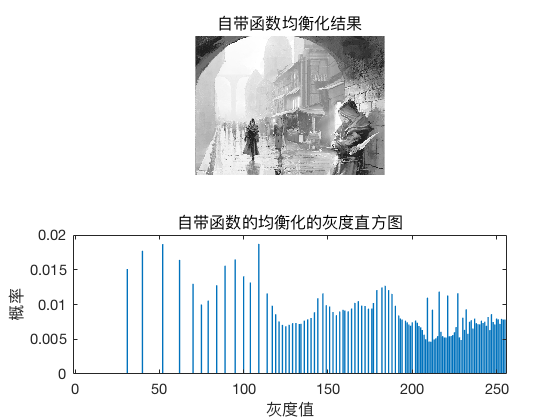

In [23]:
figure(3)
subplot(211)
imshow(img_gray_eq), title('自带函数均衡化结果')
subplot(212)
bar(gray_xc_eq,gray_cnt_eq/m/n), title('自带函数的均衡化的灰度直方图'), xlabel('灰度值'), ylabel('概率')